<a href="https://colab.research.google.com/github/zhiweing/WID2003-INTRO-TO-DS-/blob/main/Sleep_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [96]:
import pandas as pd
DATA_DIR_1 ="/content/Sleep_health_and_lifestyle_dataset.csv"
Sleep_Health_df = pd.read_csv (DATA_DIR_1, header=0)

# INFO OF DATA SET

In [97]:
#show the info of the data sets
Sleep_Health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# DATA CLEANING :

# Inspecting data frame

In [51]:

#All columns have the correct data type.
#Inspecting DataFrame
Sleep_Health_df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [52]:
#It seems there are some duplicates in the DataFrame, such as in rows 7, 8 and 9.
Sleep_Health_df.iloc[7:10]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [53]:

duplicated_rows = Sleep_Health_df[Sleep_Health_df.drop(columns ="Person ID").duplicated()]
duplicated_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 2 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                242 non-null    int64  
 1   Gender                   242 non-null    object 
 2   Age                      242 non-null    int64  
 3   Occupation               242 non-null    object 
 4   Sleep Duration           242 non-null    float64
 5   Quality of Sleep         242 non-null    int64  
 6   Physical Activity Level  242 non-null    int64  
 7   Stress Level             242 non-null    int64  
 8   BMI Category             242 non-null    object 
 9   Blood Pressure           242 non-null    object 
 10  Heart Rate               242 non-null    int64  
 11  Daily Steps              242 non-null    int64  
 12  Sleep Disorder           242 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 26.5+ KB



#Update Data Frame without duplicate value




1.Removes duplicate rows from the DataFrame
Sleep_Health_df, considering only the values in columns starting from the second column and store in new data frame known as df.dd blockquote

2.Show up the info of new data frame where the duplicate value have been removed



In [54]:
#update data frame by removing duplicate value
#new data frame contain only the unique rows from the original Sleep_Health_df DataFrame
Sleep_Health_df = Sleep_Health_df.drop_duplicates(subset=Sleep_Health_df.columns[1:]).reset_index(drop=True)
Sleep_Health_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                132 non-null    int64  
 1   Gender                   132 non-null    object 
 2   Age                      132 non-null    int64  
 3   Occupation               132 non-null    object 
 4   Sleep Duration           132 non-null    float64
 5   Quality of Sleep         132 non-null    int64  
 6   Physical Activity Level  132 non-null    int64  
 7   Stress Level             132 non-null    int64  
 8   BMI Category             132 non-null    object 
 9   Blood Pressure           132 non-null    object 
 10  Heart Rate               132 non-null    int64  
 11  Daily Steps              132 non-null    int64  
 12  Sleep Disorder           132 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 13.5+ KB


In [55]:
Sleep_Health_df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
5,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
6,11,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,None
7,14,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,None
8,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
9,18,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea


Based on the new data frame we can observed that ID 5,12 and 13 have been removed.The new data frame contain only unique column.


# Removing unecessary column

Here we are removing index column since it is merely a nummber represent number of data and now even with wrong index after removing the duplicate index.

In [56]:
Sleep_Health_df = Sleep_Health_df.drop('Person ID', axis=1)
Sleep_Health_df.head(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
5,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
6,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,None
7,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,None
8,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
9,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,Sleep Apnea


# Replace unecessary value
There seems to be a redundancy with 'Normal' and 'Normal Weight' in BMI Category: this might require cleaning.We replce Normal weight with normal this case

In [57]:
# Replace occurrences of 'Normal Weight' with 'Normal' in the 'BMI Category' column
Sleep_Health_df['BMI Category'] = Sleep_Health_df['BMI Category'].replace({'Normal Weight': 'Normal'})

# Count the occurrences of each unique value in the 'BMI Category' column
value_counts = Sleep_Health_df['BMI Category'].value_counts().reset_index()

# Rearrange columns to have 'BMI Category' in the middle
value_counts = value_counts.reindex(columns=['index', 'BMI Category'])

# Rename the columns to match your desired format
value_counts.columns = ['BMI Category', 'Count']

# Display the DataFrame
print(value_counts)

  BMI Category  Count
0       Normal     73
1   Overweight     52
2        Obese      7


# Occupation column analysis

In [58]:
# Let's check the values in the Occupations column
Sleep_Health_df['Occupation'].value_counts()

Nurse                   29
Doctor                  24
Engineer                22
Teacher                 15
Lawyer                  15
Accountant              11
Salesperson              9
Software Engineer        3
Scientist                2
Sales Representative     1
Manager                  1
Name: Occupation, dtype: int64

# From the results, we have some considerations:
-'Saleperson' could be merged with 'Sales Representative'

-'Software Engineer' could be merged with 'Engineer'

-The 'Scientist' and 'Manager' occupations are too poorly represented in the dataset to enable significant analysis, so we decide to delete the rows related to them from the DataFrame.

In [59]:
# Merging similar Occupations
Sleep_Health_df["Occupation"] = Sleep_Health_df["Occupation"].replace({'Sales Representative': 'Salesperson'})

Sleep_Health_df["Occupation"] = Sleep_Health_df["Occupation"].replace({'Software Engineer': 'Engineer'})

In [60]:
# Deleting the Rows with Scientist and Manager as Occupation
index_drop = Sleep_Health_df[Sleep_Health_df['Occupation'].isin(['Manager', 'Scientist'])].index
Sleep_Health_df= Sleep_Health_df.drop(index_drop)

In [61]:
Sleep_Health_df['Occupation'].value_counts()

Nurse          29
Engineer       25
Doctor         24
Teacher        15
Lawyer         15
Accountant     11
Salesperson    10
Name: Occupation, dtype: int64

# **Exploratory Data Analysis**

# **general view**

In [62]:
# Descriptive Statistics
Sleep_Health_df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,41.217054,7.100775,7.186047,58.689922,5.519380,71.062016,6666.666667
std,8.858225,0.771818,1.248546,20.557769,1.745981,4.814938,1776.422552
min,27.000000,5.900000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5000.000000
50%,41.000000,7.200000,7.000000,60.000000,6.000000,70.000000,7000.000000
75%,49.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


The descriptive statistics provide the following insights:

– The average age of individuals in the dataset is approximately 41 years, with a minimum of 27 and a maximum of 59 years.

– The average sleep duration is approximately 7.1 hours, with a minimum of 5.8 and a maximum of 8.5 hours.

– The average quality of sleep rating is 7.2 on a scale of 1 to 10, with a minimum of 4 and a maximum of 9.

– The average physical activity is 58 minutes per day.

– The average stress level is around 5.5 on a scale of 1 to 10.

– The average heart rate is approximately 71 beats per minute.

– The average number of daily steps is around 6,600.

# **Numerical Variables**

Checking the distribution of each numerical variable to identify any anomalies or outliers.

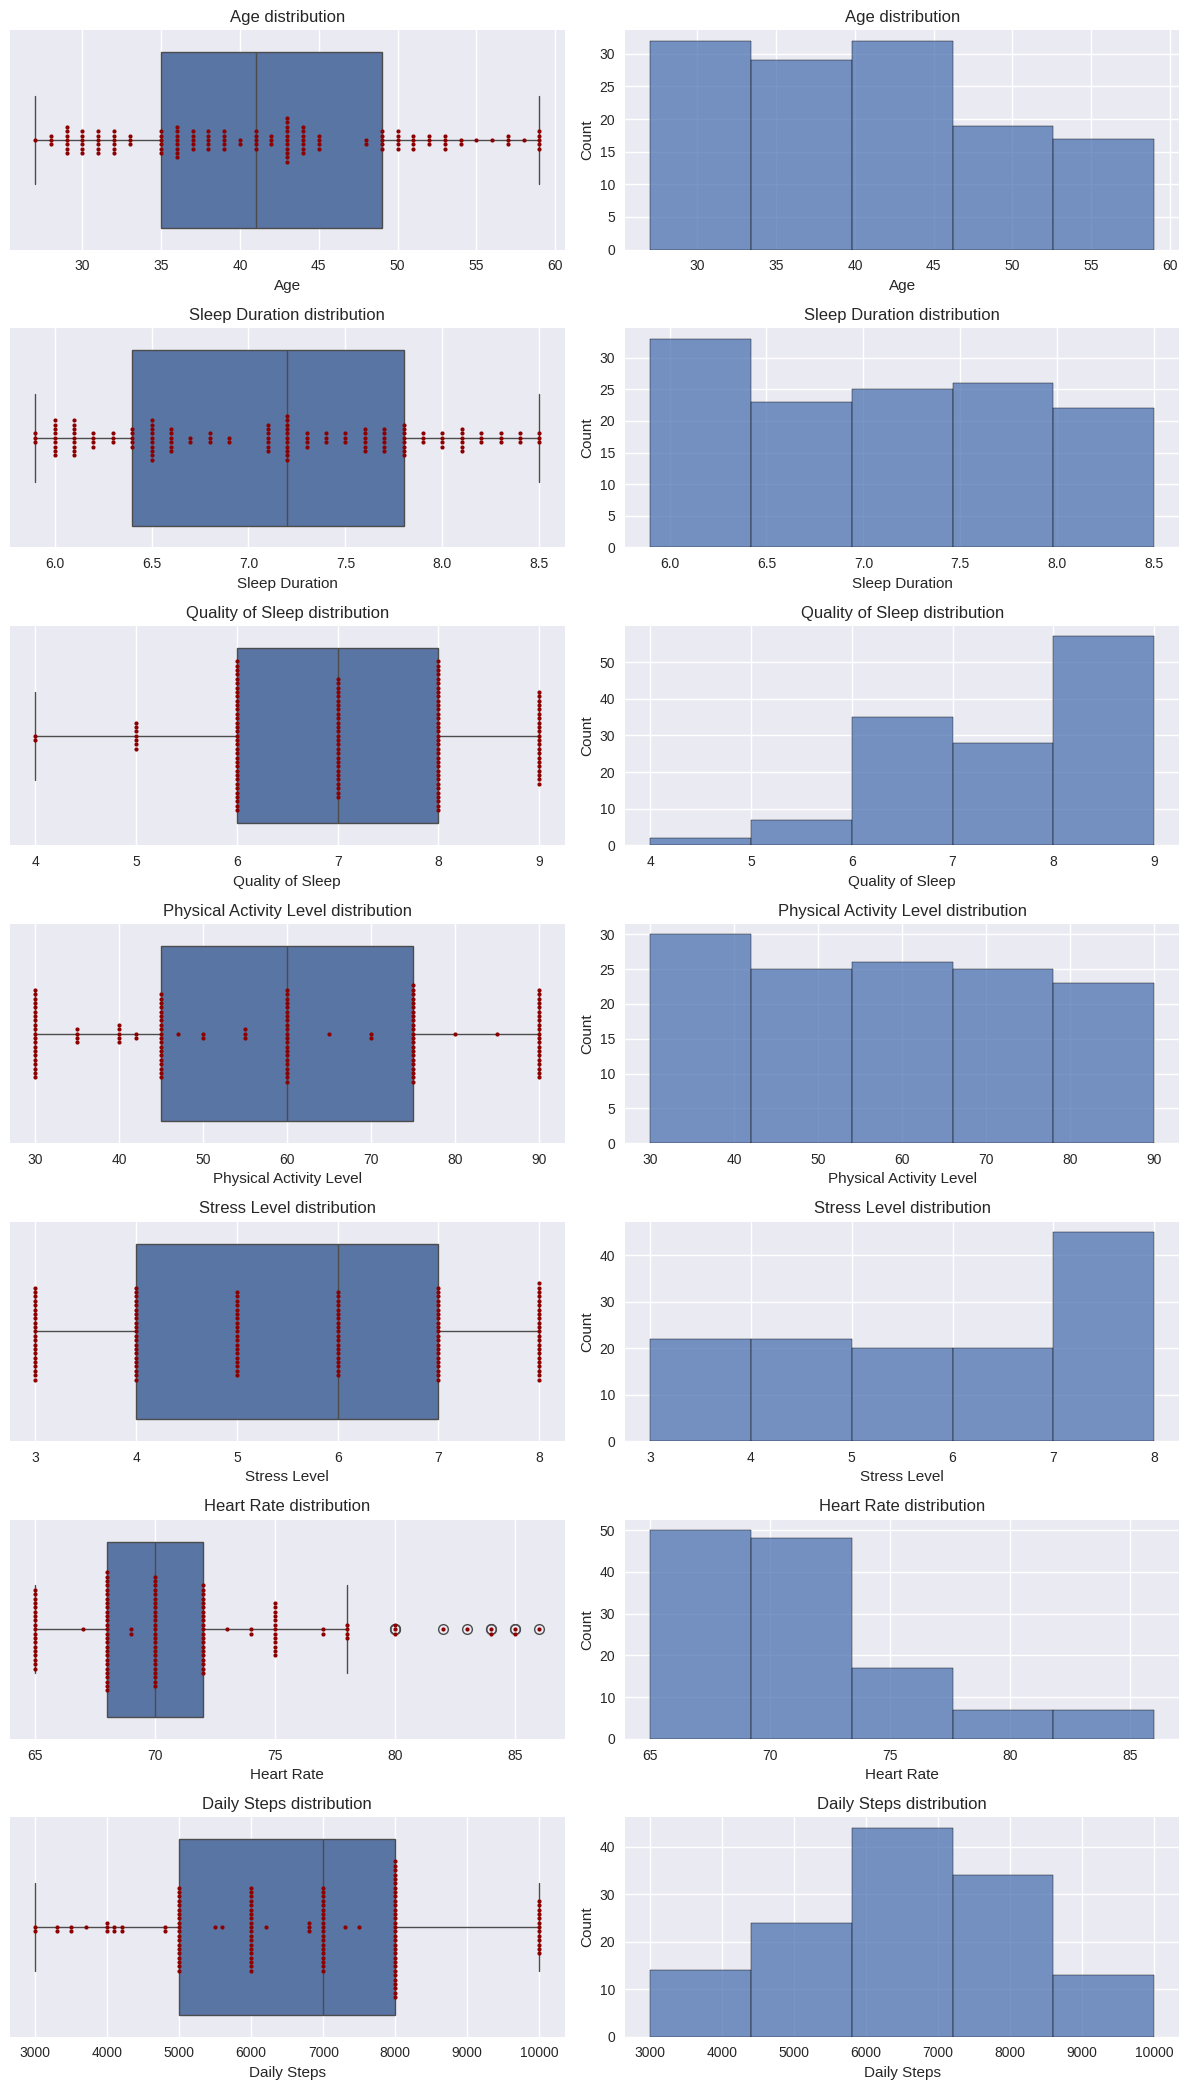

In [80]:
# List of numerical columns to plot
num_column = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

# Create a 7x2 subplot
fig, axs = plt.subplots(7, 2, figsize=(12, 3 * 7))

import warnings

# Suppress warnings due to old Seaborn version
warnings.simplefilter(action='ignore', category=FutureWarning)

# Iterate through each numerical column
for col in num_column:
    # Swarmplot and boxplot on the left
    sns.swarmplot(data=Sleep_Health_df, x=col,s=3, color='darkred', ax=axs[num_column.index(col), 0])
    sns.boxplot(data=Sleep_Health_df, x=col, ax=axs[num_column.index(col), 0])
    # Histogram on the right
    sns.histplot(data=Sleep_Health_df, x=col, bins=5, ax=axs[num_column.index(col), 1])

    axs[num_column.index(col), 0].set_title(col + ' distribution')
    axs[num_column.index(col), 1].set_title(col + ' distribution')

plt.tight_layout()
# Show the plots
plt.show()

Based on the boxplot,we can clearly see that the only metric that have outliers is heart rate.However,according to Dr. Edward Laskowski,a normal resting heart rate for adults ranges from 60 to 100 beats per minute.So it is not necessary to handle it.

# Occupation view
count of occupation

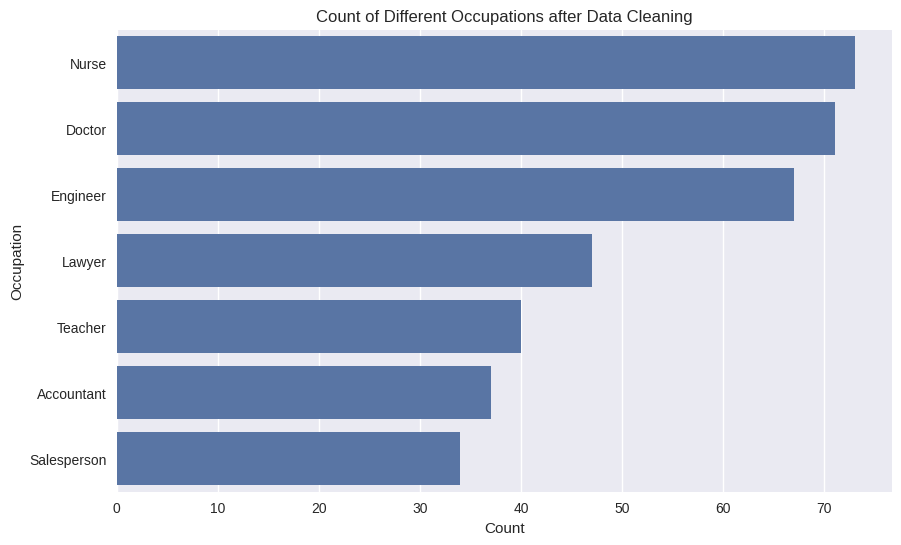

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the count of each occupation after data cleaning
occupation_counts_cleaned = Sleep_Health_df['Occupation'].value_counts()

# Sort the occupations based on their counts in ascending order
sorted_occupations_cleaned = occupation_counts_cleaned.index.tolist()

# Plotting count of different occupations after data cleaning
plt.figure(figsize=(10, 6))
sns.countplot(y="Occupation", data=Sleep_Health_df, order=sorted_occupations_cleaned)
plt.title("Count of Different Occupations after Data Cleaning")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()


# Relationship between occupation,stress and quality of sleep

In [69]:
# Calculate the mean stress level by occupation
stress_by_occupation = Sleep_Health_df.groupby('Occupation')['Stress Level'].mean().reset_index()

# Display the result
print(stress_by_occupation)

    Occupation  Stress Level
0   Accountant      4.818182
1       Doctor      6.541667
2     Engineer      4.480000
3       Lawyer      5.133333
4        Nurse      5.758621
5  Salesperson      7.100000
6      Teacher      5.000000


Baesd on the table,Enginer,Teachers and Accountant seems to have lesser stress level when compared to sales Representative, Salespersons and Scientist


Find out the relationship between stress and occupation

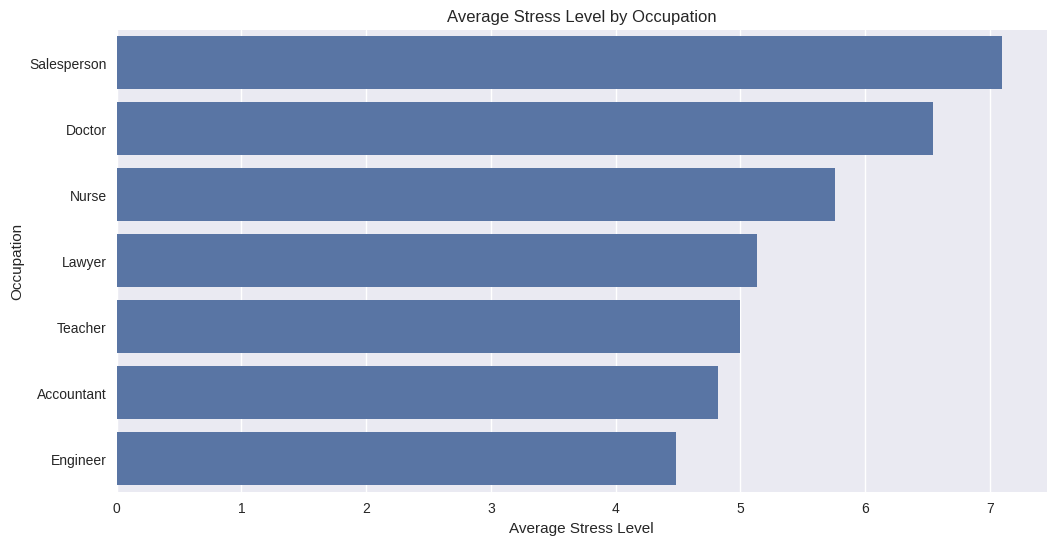

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plotting the barplot
sns.barplot(x='Stress Level', y='Occupation', data=stress_by_occupation.sort_values('Stress Level', ascending=False))

# Set title and labels
plt.title('Average Stress Level by Occupation')
plt.xlabel('Average Stress Level')
plt.ylabel('Occupation')

# Show the plot
plt.show()

Enginer,Teachers and Accountant seems to have lesser stress level when compared to sales Representative, Salespersons and Scientist.Based on this,we can analysehow stress level affect quality of sleep.

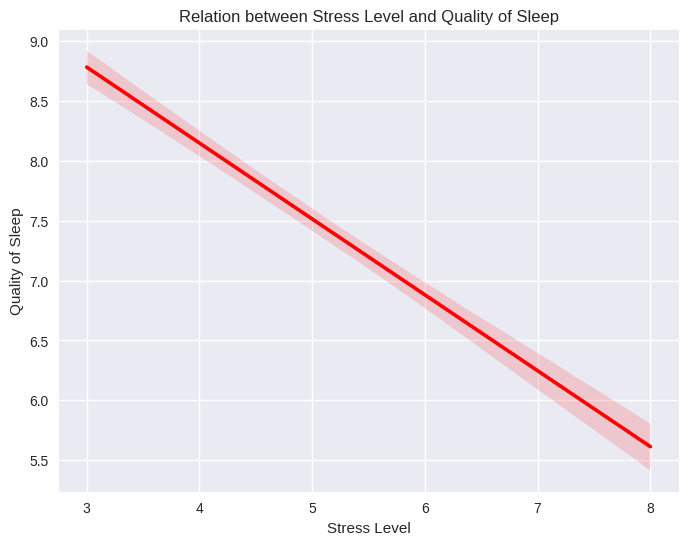

In [77]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Stress Level', y='Quality of Sleep', data=Sleep_Health_df, scatter=False, line_kws={'color':'red'})
plt.title('Relation between Stress Level and Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()


We notice a significant negative correlation between stress levels and the quality of sleep.This finding isn't particularly surprising because a negative relationship suggests that when stress levels are high, individuals may struggle to fall asleep, experience more frequent awakenings during the night, or generally have disrupted and poorer sleep quality

# **Relationship between Sleep Duration and Quality of Sleep**

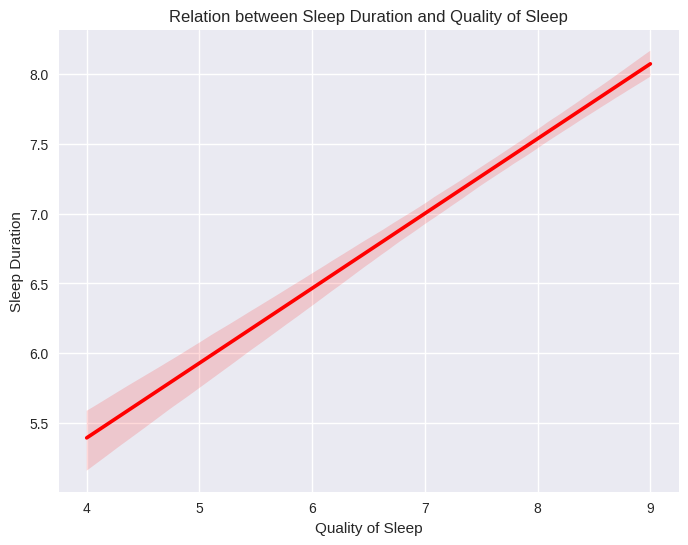

In [76]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Quality of Sleep', y='Sleep Duration', data=Sleep_Health_df, scatter=False, line_kws={'color':'red'})
plt.title('Relation between Sleep Duration and Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Sleep Duration')
plt.show()


It is obvious that the higher the sleep duration ,the higher the quality of sleep. This is because getting sufficient sleep allows the body and mind to go through the full cycles of the sleep stages.

# Relationship between gender and quality of sleep